In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder

In [22]:
# Load the dataset
df = pd.read_csv("C:/Users/Administrator/Desktop/BSD 4.2/Machine Learning/PS_20174392719_1491204439457_log.csv")

# Display the first few rows
print(df.head())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


In [7]:
# Check column names, data types, and missing values
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Summarize statistical properties
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB
None
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64
               step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.433972e+02  1.798619e+05   8.338831e+05    8.551137e+05   
std 

Dataset loaded successfully!
   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


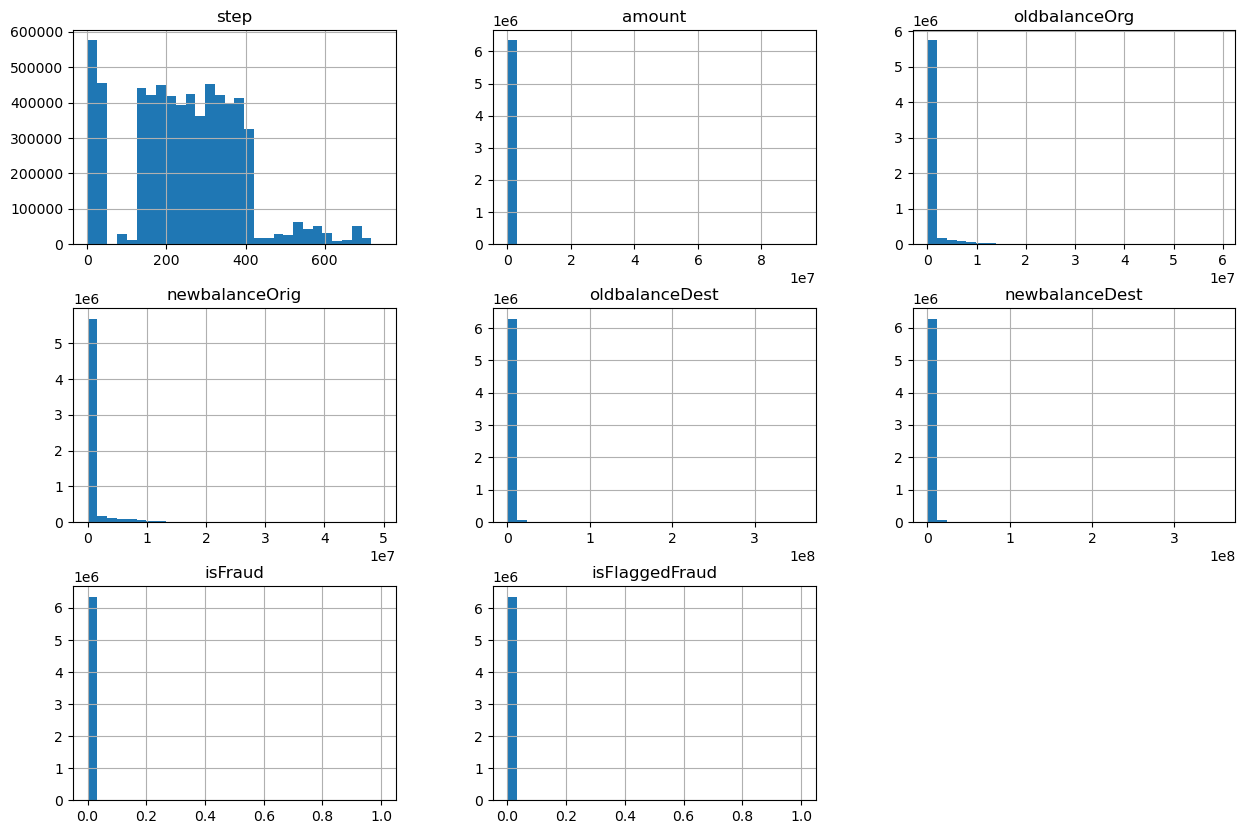

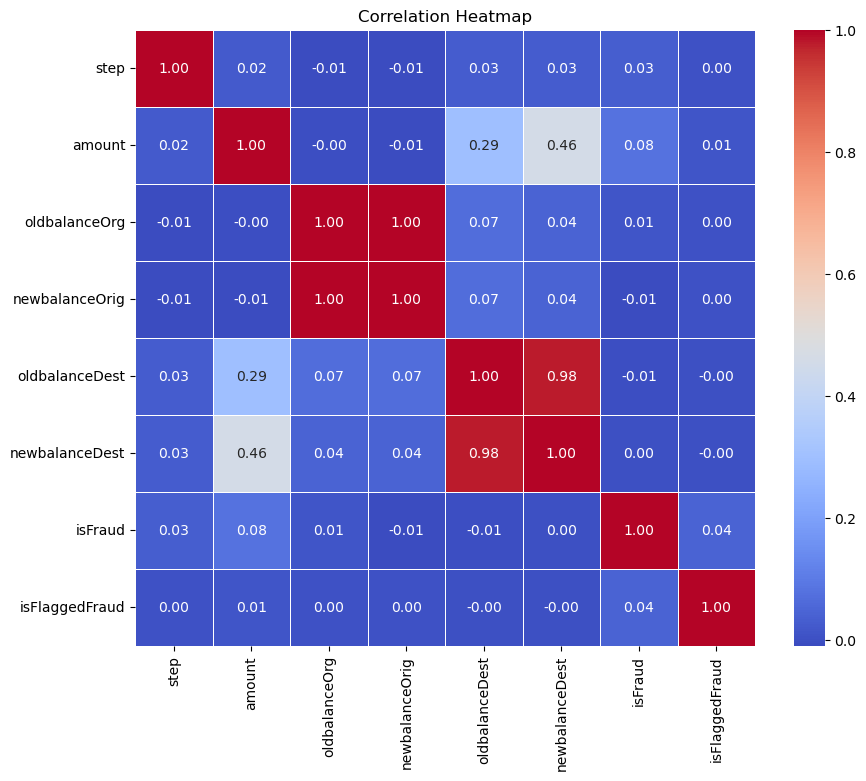

In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "C:/Users/Administrator/Desktop/BSD 4.2/Machine Learning/PS_20174392719_1491204439457_log.csv"

try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: The specified file was not found.")
    df = None  # Prevent further errors if the file is missing

# Proceed only if df is loaded successfully
if df is not None:
    # Display the first few rows
    print(df.head())

    # Plot histograms for numerical features
    numeric_df = df.select_dtypes(include=['float64', 'int64'])  # Select only numeric columns

    if not numeric_df.empty:
        numeric_df.hist(bins=30, figsize=(15, 10))
        plt.show()

        # Plot correlation heatmap
        plt.figure(figsize=(10, 8))
        sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
        plt.title("Correlation Heatmap")
        plt.show()
    else:
        print("No numeric columns found for visualization.")


In [ ]:
# Remove columns with excessive missing data (e.g., >50% missing)
df = df.dropna(axis=1, thresh=len(df) * 0.5)

# Fill missing values for numerical columns with mean or median
df.fillna(df.mean(), inplace=True)

# Fill missing values for categorical columns with mode
df.fillna(df.mode().iloc[0], inplace=True)

In [27]:
from sklearn.preprocessing import LabelEncoder

# Label encoding for binary categorical variables
label_encoder = LabelEncoder()
df['isFraud'] = label_encoder.fit_transform(df['isFraud'])  # Encoding binary column

# One-hot encoding for multi-class categorical variables (e.g., 'type')
df = pd.get_dummies(df, columns=['type'], drop_first=True)  # Encoding categorical column

print(df.head())  # Display first few rows to check changes


   step    amount     nameOrig  oldbalanceOrg  newbalanceOrig     nameDest  \
0     1   9839.64  C1231006815       170136.0       160296.36  M1979787155   
1     1   1864.28  C1666544295        21249.0        19384.72  M2044282225   
2     1    181.00  C1305486145          181.0            0.00   C553264065   
3     1    181.00   C840083671          181.0            0.00    C38997010   
4     1  11668.14  C2048537720        41554.0        29885.86  M1230701703   

   oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  type_CASH_OUT  \
0             0.0             0.0        0               0          False   
1             0.0             0.0        0               0          False   
2             0.0             0.0        1               0          False   
3         21182.0             0.0        1               0           True   
4             0.0             0.0        0               0          False   

   type_DEBIT  type_PAYMENT  type_TRANSFER  
0       False          

In [31]:
# Initialize the scaler (e.g., StandardScaler or MinMaxScaler)
scaler = StandardScaler()

# Scale numerical features
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

print("Scaling complete!")
print(df.head())  # Check the transformed values


Scaling complete!
       step    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0 -1.703042 -0.281560  C1231006815      -0.229810       -0.237622   
1 -1.703042 -0.294767  C1666544295      -0.281359       -0.285812   
2 -1.703042 -0.297555  C1305486145      -0.288654       -0.292442   
3 -1.703042 -0.297555   C840083671      -0.288654       -0.292442   
4 -1.703042 -0.278532  C2048537720      -0.274329       -0.282221   

      nameDest  oldbalanceDest  newbalanceDest    isFraud  isFlaggedFraud  \
0  M1979787155       -0.323814       -0.333411  -0.035951       -0.001586   
1  M2044282225       -0.323814       -0.333411  -0.035951       -0.001586   
2   C553264065       -0.323814       -0.333411  27.815483       -0.001586   
3    C38997010       -0.317582       -0.333411  27.815483       -0.001586   
4  M1230701703       -0.323814       -0.333411  -0.035951       -0.001586   

   type_CASH_OUT  type_DEBIT  type_PAYMENT  type_TRANSFER  
0          False       False          True  

In [35]:
# Remove duplicate transactions
df = df.drop_duplicates()

# Detect and remove outliers using IQR (for numeric columns only)
Q1 = df.select_dtypes(include=['number']).quantile(0.25)
Q3 = df.select_dtypes(include=['number']).quantile(0.75)
IQR = Q3 - Q1

# Apply IQR filtering only on numerical columns
num_cols = df.select_dtypes(include=['number']).columns
df = df[~((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

print("Outliers removed successfully!")
print(df.shape)  # Check the new size of the DataFrame


Outliers removed successfully!
(4319406, 14)


In [37]:
# Define features (X) and target (y)
X = df.drop('isFraud', axis=1)  # Use 'isFraud' (correct column name)
y = df['isFraud']

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the splits
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(3455524, 13) (863882, 13) (3455524,) (863882,)


In [39]:
# Save the preprocessed data to a new CSV file
df.to_csv('preprocessed_fraud_data.csv', index=False)
